In [2]:
import pandas as pd
import os 
from runtime_calculation import cal_cost_overall_700yr_new_timing_model
import glob
import re
import numpy as np
import config
import matplotlib.pyplot as plt
# data = pd.read_csv('PyFstat_example_data/PyFstatExampleSimpleMCMCvsGridComparisonSemi/combined_mismatch_results.csv')
# data

In [3]:
import glob, os, re, pandas as pd

log_dir = "PyFstat_example_data/PyFstatExampleSimpleMCMCvsGridComparisonSemi"
rows = []

for path in glob.glob(os.path.join(log_dir, "mcmc_*")):
    # 1. read the 500 mismatches – keep header=None
    try:
        mm = pd.read_csv(os.path.join(path, "mismatches.csv")).squeeze("columns")
        if mm.empty:
            continue
    except FileNotFoundError:
        continue

    # 2. parse mf, mf1, mf2
    freqs = {                     # {'mf': …, 'mf1': …, 'mf2': …}
        "mf" if idx == "" else f"mf{idx}": float(val)
        for idx, val in re.findall(r"mf(\d?)([0-9]+\.[0-9]+)", path)
    }
    if not freqs:
        continue

    # 3. robust run-index: matches 0079 or 79 or 79.0 alike
    m_run = re.search(r"run_(\d+(?:\.\d+)?)_", path)
    freqs["index"] = float(m_run.group(1)) if m_run else pd.NA

    # 4. duplicate mf values for every mismatch
    rows.extend({**freqs, "mismatch": v} for v in mm)

df = pd.DataFrame(rows).dropna()
df['index'] = df['index'].astype(int)  # ensure index is float
df = df.sort_values(by="index").reset_index(drop=True)
# print(df.head(), "\nTotal rows:", len(df))

df['dF0_calculated'] = np.sqrt(12 * df.mf) / (np.pi * config.T_coh)
df['dF1_refined_calculated'] = np.sqrt(180 * df.mf1) / (np.pi * config.T_coh**2) / config.gamma1
df

,mf,mf1,mf2,index,mismatch,dF0_calculated,dF1_refined_calculated
0,0.249816,0.480286,0.065049,1,0.358782,4.252515e-07,2.202604e-13
1,0.249816,0.480286,0.065049,1,0.364196,4.252515e-07,2.202604e-13
2,0.249816,0.480286,0.065049,1,0.310785,4.252515e-07,2.202604e-13
3,0.249816,0.480286,0.065049,1,0.345893,4.252515e-07,2.202604e-13
4,0.249816,0.480286,0.065049,1,0.499929,4.252515e-07,2.202604e-13
...,...,...,...,...,...,...,...
89995,0.190901,0.286092,0.190288,300,0.365918,3.717405e-07,1.699962e-13
89996,0.190901,0.286092,0.190288,300,0.306025,3.717405e-07,1.699962e-13
89997,0.190901,0.286092,0.190288,300,0.506340,3.717405e-07,1.699962e-13
89998,0.190901,0.286092,0.190288,300,0.611921,3.717405e-07,1.699962e-13


In [4]:
# all_csv_path = 'PyFstat_example_data/PyFstatExampleSimpleMCMCvsGridComparisonSemi/tmp_dataframes1'
all_csv_path = 'PyFstat_example_data/PyFstatExampleSimpleMCMCvsGridComparisonSemi/tmp_dataframes'
all_csv_files = [f for f in os.listdir(all_csv_path) if f.endswith('.csv')] 
# Initialize an empty DataFrame to hold all data
data = pd.read_csv('data/combined_mismatch_results_20250614_204100.csv')
# data = pd.DataFrame()
#merge all csv files into one dataframe

# for csv_file in all_csv_files:
#     csv_path = os.path.join(all_csv_path, csv_file)
#     df = pd.read_csv(csv_path)
#     data = pd.concat([data, df], ignore_index=True)
data

,mismatch,mf,mf1,mf2,df,df1,df2,run_id,mf_input,mf1_input,mf2_input,dF0_calculated,dF1_refined_calculated,dF2_refined_calculated,Nf0,Nf1,Nf2,N_coh,N_inc,runtime
0,0.248762,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
1,0.079721,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
2,0.066905,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
3,0.255184,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
4,0.114864,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999495,0.206859,0.366667,0.233333,0.030000,5.151948e-07,1.535235e-13,2.010324e-19,316,0.366667,0.233333,0.030000,5.151948e-07,1.535235e-13,2.010324e-19,NaN,NaN,NaN,NaN,NaN,NaN
999496,0.219511,0.366667,0.233333,0.030000,5.151948e-07,1.535235e-13,2.010324e-19,316,0.366667,0.233333,0.030000,5.151948e-07,1.535235e-13,2.010324e-19,NaN,NaN,NaN,NaN,NaN,NaN
999497,0.327014,0.366667,0.233333,0.030000,5.151948e-07,1.535235e-13,2.010324e-19,316,0.366667,0.233333,0.030000,5.151948e-07,1.535235e-13,2.010324e-19,NaN,NaN,NaN,NaN,NaN,NaN
999498,0.362993,0.366667,0.233333,0.030000,5.151948e-07,1.535235e-13,2.010324e-19,316,0.366667,0.233333,0.030000,5.151948e-07,1.535235e-13,2.010324e-19,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
from datetime import datetime
data.to_csv(f'data/combined_mismatch_results_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv', index=False)

In [27]:
numbers = 500
num_workers = 14
tstart = 1000000000
duration = 120 * 86400
T_coh = 15 * 86400  # coherence time for the MCMC
nsegs = int(duration / T_coh)  # number of segments for the MCMC
Tsft = 1800
detectors = "H1,L1"
sqrtSX = 1e-22

gamma1 = 8
gamma2 = 20
DeltaF0_fixed = 9.885590880794127e-06 * 10
DeltaF1_fixed = 3.481585082097677e-12 * 10
DeltaF2_fixed = 6.357202196709655e-19 * 10



N_det = 2

N_can = 0

tau_Fbin = 6e-8
tau_fft = 3.3e-8
tau_spin = 7.5e-8
tau_bayes = 4.4e-8
tau_recalc = 0


ratio = 2

R = 1


tau_sumF = 7.28e-9 - 3.72e-10 * nsegs

tau_RS = tau_Fbin + ratio * (tau_fft + R * tau_spin)
inj = {
    "tref": tstart,
    "F0": 151.5,
    "F1": -1e-10,
    "F2": -1e-20,
    "Alpha": 0.5,
    "Delta": 1,
    "h0": 0.05 * sqrtSX,
    "cosi": 1.0,
}

def _cpu_year_sp_for_row(row):
    centre_f  = inj["F0"]
    centre_fd = inj["F1"]

    fmin  = centre_f  - DeltaF0_fixed/2
    fmax  = centre_f  + DeltaF0_fixed/2
    fdmin = centre_fd - DeltaF1_fixed/2
    fdmax = centre_fd + DeltaF1_fixed/2

    cpu_year_sp, _ = cal_cost_overall_700yr_new_timing_model(
        fmin=fmin,   fmax=fmax,
        fdotmin=fdmin, fdotmax=fdmax,
        fsp=centre_f,  fdotsp=centre_fd,        # dummy
        fband_cell=row["dF0_calculated"],
        fdotband_cell=row["dF1_refined_calculated"],
        m0=row["mf"],  m1=row["mf1"], m2=row["mf2"],
        r1=gamma1, r2=gamma2,
        Tcoh_day=T_coh/86400,
        nSFT=numbers,  nSeg=nsegs,
        tau=700,  n=5,
        fbandwidth=1.0,
    )
    return cpu_year_sp * 86400 * 365.25  # convert to seconds

In [28]:
# data['Nf0'] = DeltaF0_fixed / data.dF0_calculated
# data['Nf1'] = DeltaF1_fixed / data.dF1_refined_calculated * gamma1
# data['Nf2'] = DeltaF2_fixed / data.dF1_refined_calculated * gamma2
# data['N_coh'] = data['Nf0'] * data['Nf1'] * data['Nf2']
# data['N_inc'] = data.N_coh * gamma1 * gamma2
# data['runtime'] = nsegs * N_det * data.N_coh * tau_RS + nsegs * data.N_inc * tau_sumF + data.N_inc * tau_bayes + N_can * tau_recalc
# data["runtime"] = data.apply(_cpu_year_sp_for_row, axis=1)
# data

In [29]:
# data

In [30]:
# mean the mismatch and runtime for each 500 points
data_mean = data.groupby(['mf', 'mf1', 'mf2']).mean().reset_index()
data_mean = data_mean[['mismatch', 'runtime', 'mf2', 'mf', 'mf1', 'dF0_calculated', 'dF1_refined_calculated']]
data_mean["runtime"] = data_mean.apply(_cpu_year_sp_for_row, axis=1)
data_mean

,mismatch,runtime,mf2,mf,mf1,dF0_calculated,dF1_refined_calculated
0,0.065143,6.458501,0.000500,0.1,0.1,2.690517e-07,1.005047e-13
1,0.067029,6.458504,0.000625,0.1,0.1,2.690517e-07,1.005047e-13
2,0.073738,6.458506,0.000750,0.1,0.1,2.690517e-07,1.005047e-13
3,0.078353,6.458509,0.000875,0.1,0.1,2.690517e-07,1.005047e-13
4,0.078783,6.458511,0.001000,0.1,0.1,2.690517e-07,1.005047e-13
...,...,...,...,...,...,...,...
1794,0.378337,0.451199,0.075750,0.5,0.5,6.016179e-07,2.247354e-13
1795,0.436210,0.451207,0.150500,0.5,0.5,6.016179e-07,2.247354e-13
1796,0.471685,0.451213,0.225250,0.5,0.5,6.016179e-07,2.247354e-13
1797,0.507278,0.451218,0.300000,0.5,0.5,6.016179e-07,2.247354e-13


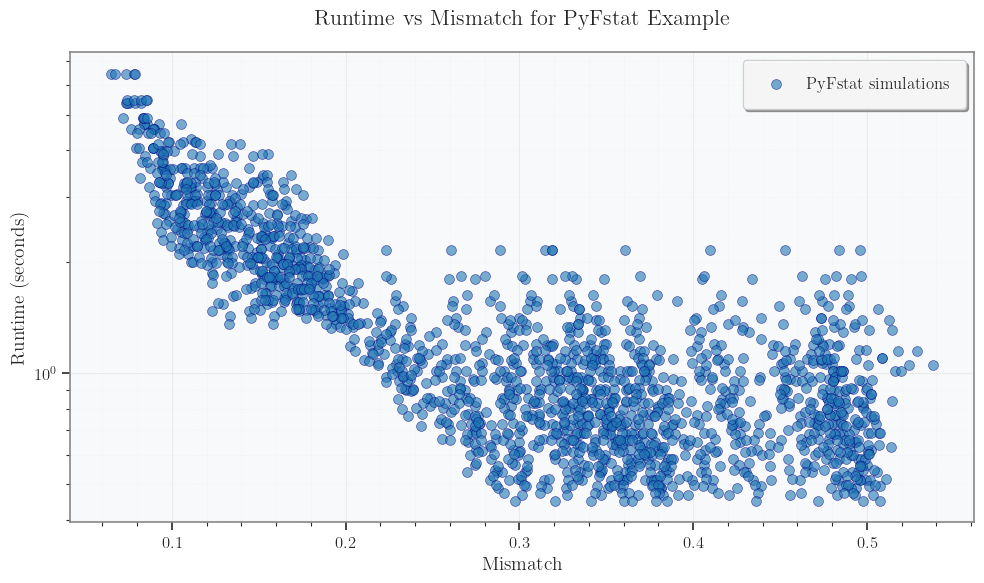

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12


# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(10, 6))

# Generate sample data (replace with your actual data)
# Note: In your actual implementation, use data_mean.mismatch and data_mean.runtime
np.random.seed(42)
# mismatch = np.random.uniform(0.07, 0.21, 500)
# runtime = np.exp(np.random.normal(-5, 0.7, 500))

# Create scatter plot with improved styling
scatter = ax.scatter(data_mean.mismatch, data_mean.runtime, 
                    alpha=0.6,                    # Add transparency
                    s=50,                         # Slightly smaller points
                    c='#1f77b4',                  # Professional blue color
                    edgecolors='navy',            # Add edge color
                    linewidth=0.5,                # Thin edge
                    label='PyFstat simulations')   # More descriptive label

# scatter = ax.scatter(data_mean.mismatch, data_mean.runtime, 
#                     alpha=0.6,                    # Add transparency
#                     s=50,                         # Slightly smaller points
#                     c=np.log(data_mean.mf2),                  # Professional blue color
#                     edgecolors='navy',            # Add edge color
#                     linewidth=0.5,                )   # More descriptive label

# Set logarithmic scale for y-axis
ax.set_yscale('log')
# ax.set_xscale('log')
# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title('Runtime vs Mismatch for PyFstat Example', 
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True, 
          shadow=True, framealpha=0.9, borderpad=1)

# Set axis limits with some padding
# ax.set_xlim(0.065, 0.215)
# ax.set_ylim(5e-3, 5e-1)

# Add statistical annotation (optional)
# You can add mean/median lines or other statistical information
# median_runtime = np.median(runtime)
# ax.axhline(y=median_runtime, color='red', linestyle='--', 
#            linewidth=1, alpha=0.5, label=f'Median: {median_runtime:.3f}s')

# Tight layout for better spacing
plt.tight_layout()

# Save the figure in high resolution
# plt.savefig('images/runtime_vs_mismatch.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('runtime_vs_mismatch.png', format='png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


/tmp/ipykernel_4844/700396586.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', frameon=True, fancybox=True,


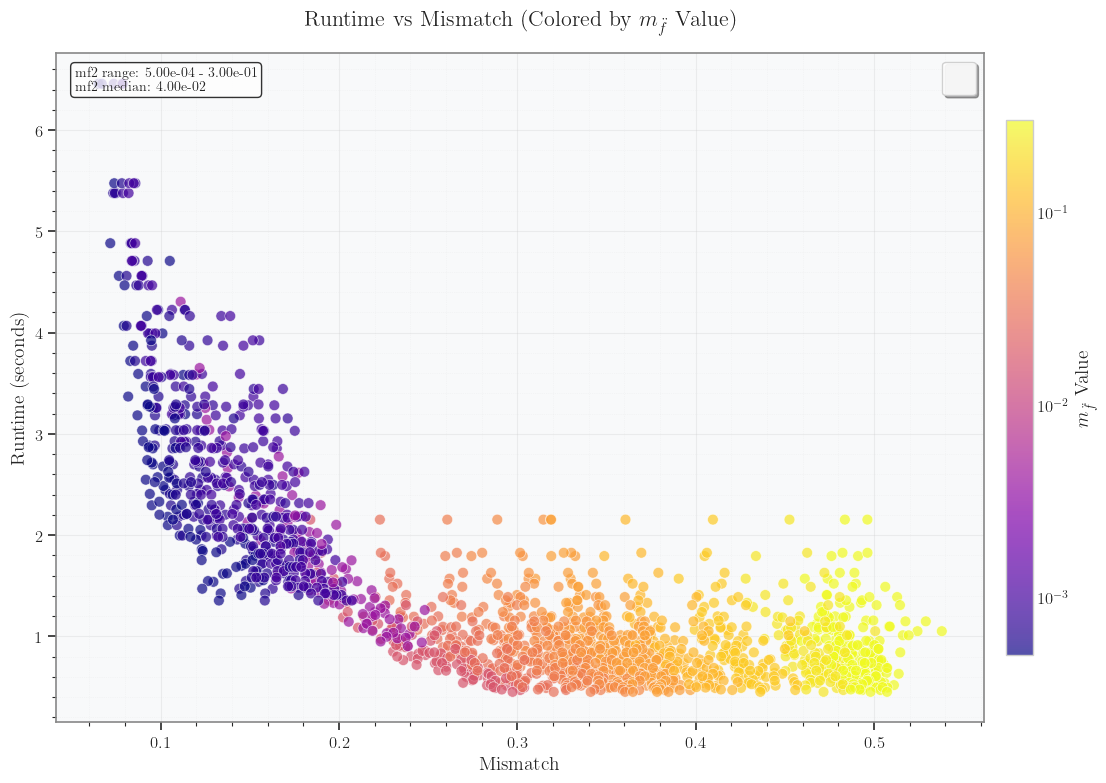

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LogNorm

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
# Enable LaTeX rendering
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(12, 8))  # Larger to accommodate colorbar

# Create scatter plot with enhanced color mapping using mf2
scatter = ax.scatter(data_mean.mismatch, data_mean.runtime,
                    alpha=0.7,                    # Good transparency for overlapping points
                    s=60,                         # Consistent point size
                    c=data_mean.mf2,              # Color represents mf2 values
                    cmap='plasma',               # Professional colormap (perceptually uniform)
                    norm=LogNorm(),               # Log normalization for mf2 (remove if linear scaling preferred)
                    edgecolors='white',           # White edges for better contrast
                    linewidth=0.5,)

# Add colorbar for mf2 values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, aspect=20, pad=0.02)
cbar.set_label(r'$m_{\ddot{f}}$ Value', fontsize=14, fontweight='medium')
cbar.ax.tick_params(labelsize=12)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title(r'Runtime vs Mismatch (Colored by $m_{\ddot{f}}$ Value)',
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True,
          shadow=True, framealpha=0.9, borderpad=1)

# Optional: Add statistics text box
mf2_stats = f'mf2 range: {data_mean.mf2.min():.2e} - {data_mean.mf2.max():.2e}\n'
mf2_stats += f'mf2 median: {data_mean.mf2.median():.2e}'
ax.text(0.02, 0.98, mf2_stats, transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontsize=10)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('images/runtime_vs_mismatch_mf2-2.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

0.21749651454838373
0.3486690240241505
0.38637958796802835
0.4259555981669798
0.4645171374820241


/tmp/ipykernel_4844/3537779779.py:138: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0, 0.61])  # set x-limits to focus on the mismatch range


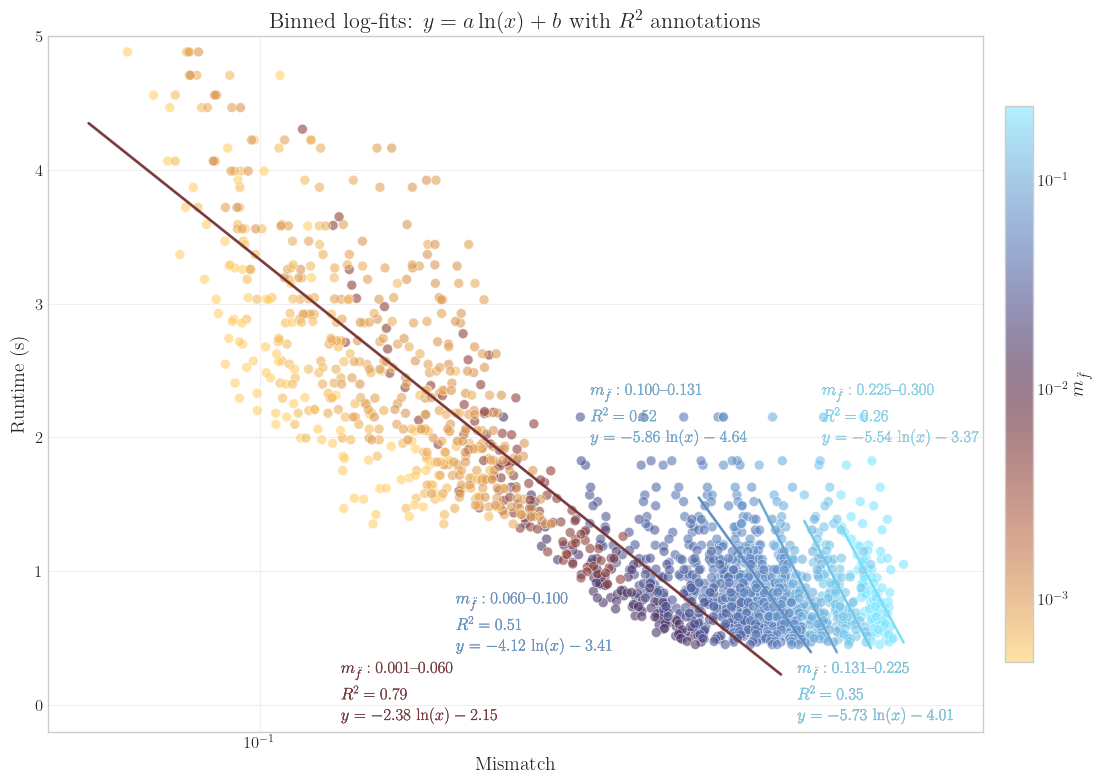

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
import matplotlib.patheffects as pe


def plot_binned_fits(
    df,
    n_bins=6,
    bin_edges=None,
    binning="log",  # 'log' or 'quantile'
    cmap_name="plasma",
):
    """
    Plot df.mismatch vs df.runtime and overlay
    one y = a ln(x) + b fit per mf2-bin, with annotations
    showing the mf2-range and R^2 for each bin.
    """
    x_data = df.mismatch.values
    y_data = df.runtime.values
    mf2    = df.mf2.values

    # --- 1) Determine bin edges
    if bin_edges is None:
        if binning == "quantile":
            qs = np.linspace(0,1,n_bins+1)
            bin_edges = np.quantile(mf2, qs)
        else:
            bin_edges = np.logspace(
                np.log10(mf2.min()), np.log10(mf2.max()), n_bins+1
            )
    else:
        bin_edges = np.asarray(bin_edges)

    # --- 2) Bin assignment
    bin_idx = np.digitize(mf2, bin_edges) - 1
    bin_idx = np.clip(bin_idx, 0, len(bin_edges)-2)

    # --- 3) Setup colormap & figure
    cmap = plt.get_cmap(cmap_name)
    norm = LogNorm(vmin=mf2.min(), vmax=mf2.max())
    fig, ax = plt.subplots(figsize=(12,8))

    sc = ax.scatter(
        x_data, y_data,
        c=mf2, cmap=cmap, norm=norm,
        s=50, edgecolors='white', lw=0.5, alpha=0.6
    )

    # --- model definition
    def fit_func(x,a,b):
        return a*np.log(x) + b

    
    xm_text = [0.15, 0.2, 0.28, 0.47, 0.5]
    ym_text = [0.1, 0.2, 0.5, 0.1, 0.5]  # y=0.02 in axes coords (just above the x‐axis)
    # --- 4) Loop & fit per bin
    for b in range(len(bin_edges)-1):
        mask = bin_idx==b
        x = x_data[mask]
        y = y_data[mask]
        if len(x) < 3:
            continue

        # fit parameters
        popt, _ = curve_fit(fit_func, x, y)

        # predicted on a fine grid
        x_fit = np.linspace(x.min(), x.max(), 200)
        y_fit = fit_func(x_fit, *popt)

        # compute R^2 on the actual points
        y_pred = fit_func(x, *popt)
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2     = 1 - ss_res/ss_tot

        # color by bin-center
        mf2_low, mf2_high = bin_edges[b], bin_edges[b+1]
        mf2_center = np.sqrt(mf2_low*mf2_high)
        color = cmap(norm(mf2_center))

        # plot with black outline
        ax.plot(
            x_fit, y_fit,
            color=color, lw=2, alpha=0.9,
            path_effects=[
                pe.Stroke(linewidth=.6, foreground="black"),
                pe.Normal()
            ]
        )

        # annotate at midpoint
        xm = x_fit[len(x_fit)//2]
        ym = y_fit[len(y_fit)//2]
        # inside the for-bin loop, after computing mf2_low, mf2_high, r2:

        # instead of `a, b = popt`, do:
        a_fit, b_fit = popt

        txt = (
            r"$\begin{array}{l}"
            rf"m_{{\ddot f}}: {mf2_low:.3f}\text{{--}}{mf2_high:.3f}\\[0.8ex]"
            rf"R^2 = {r2:.2f}\\"
            rf"y = {a_fit:.2f}\,\ln(x)-{-b_fit:.2f}"
            r"\end{array}$"
        )

        print(xm)
        ax.text(
            xm_text[b], ym_text[b],
            txt,
            transform = ax.get_xaxis_transform(),
            color     = color,
            fontsize  = 12,
            ha        = 'center',
            va        = 'top',
            bbox      = dict(facecolor='none', edgecolor='none'),
            alpha     = 1,
            path_effects=[
                pe.Stroke(linewidth=.1, foreground='black'),  # 黑色描边
                pe.Normal()                                   # 原文字正常绘制在描边上
            ]
        )

    # --- 5) Finalize
    cbar = fig.colorbar(sc, ax=ax, shrink=0.8, aspect=20, pad=0.02)
    cbar.set_label(r"$m_{\ddot f}$", fontsize=14)

    ax.set_xscale("log")
    ax.set_xlabel("Mismatch", fontsize=14)
    ax.set_ylabel("Runtime (s)", fontsize=14)
    ax.set_title("Binned log-fits: $y=a\\ln(x)+b$ with $R^2$ annotations", fontsize=16)
    ax.grid(True, which="major", linestyle="-", alpha=0.3)
    ax.minorticks_on()
    ax.set_ylim([-0.2, 5])  # set y-limits to focus on the runtime range
    ax.set_xlim([0, 0.61])  # set x-limits to focus on the mismatch range
    plt.tight_layout()
    plt.savefig('images/binned_fits_runtime_vs_mismatch-2.pdf', format='pdf', bbox_inches='tight')
    plt.show()


# Example with manual edges:
manual_edges = [5e-4, 0.06, 0.1, 0.1305, 0.22525, 0.3]
plot_binned_fits(data_mean[data_mean.mf2 < 0.25], bin_edges=manual_edges, cmap_name='managua')


0.19688294166539835
0.3142461682069788
0.3486690240241505
0.38637958796802835
0.4259555981669798
0.4645171374820241


/tmp/ipykernel_4844/2924898073.py:161: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0, 0.61])  # set x-limits to focus on the mismatch range


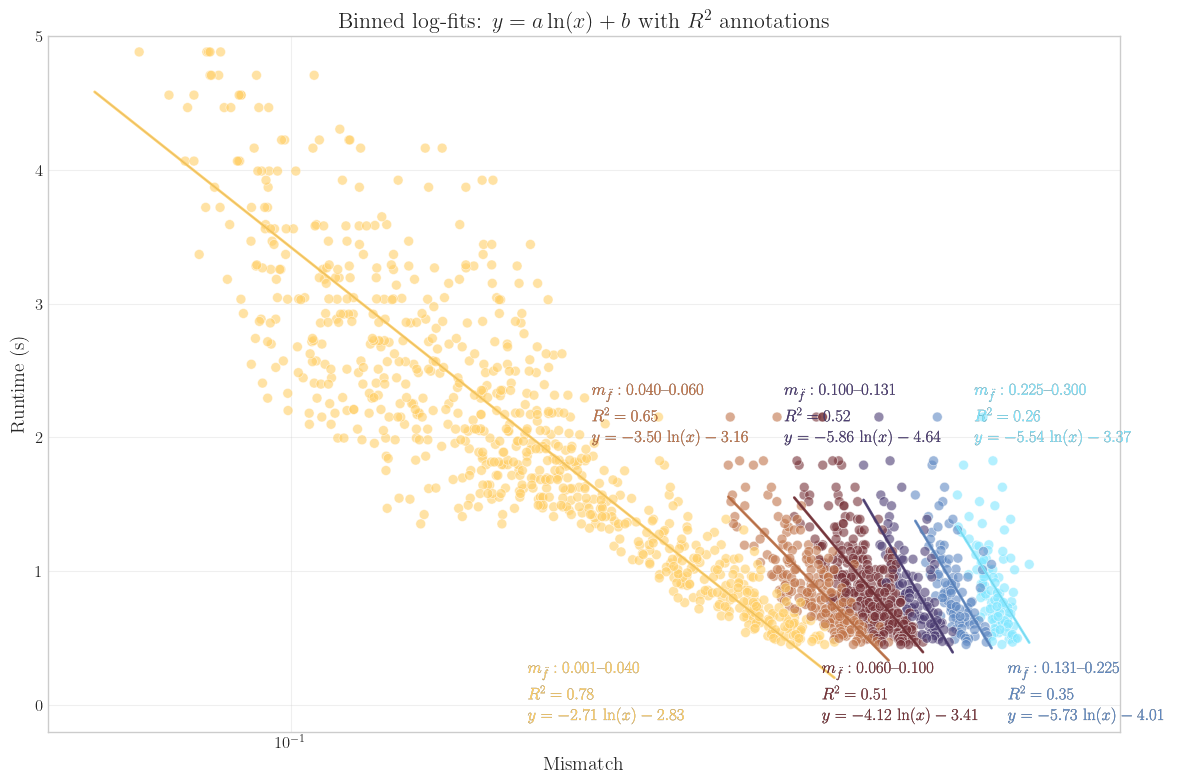

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
import matplotlib.patheffects as pe


def plot_binned_fits(
    df,
    n_bins=6,
    bin_edges=None,
    binning="log",  # 'log' or 'quantile'
    cmap_name="plasma",
):
    """
    Plot df.mismatch vs df.runtime and overlay
    one y = a ln(x) + b fit per mf2-bin, with annotations
    showing the mf2-range and R^2 for each bin.
    """
    x_data = df.mismatch.values
    y_data = df.runtime.values
    mf2    = df.mf2.values

    # --- 1) Determine bin edges
    if bin_edges is None:
        if binning == "quantile":
            qs = np.linspace(0,1,n_bins+1)
            bin_edges = np.quantile(mf2, qs)
        else:
            bin_edges = np.logspace(
                np.log10(mf2.min()), np.log10(mf2.max()), n_bins+1
            )
    else:
        bin_edges = np.asarray(bin_edges)

    # --- 2) Bin assignment
    bin_idx = np.digitize(mf2, bin_edges) - 1
    bin_idx = np.clip(bin_idx, 0, len(bin_edges)-2)

    # --- 3) Setup colormap & figure ------------------------------------------
    cmap  = plt.get_cmap(cmap_name)          # original continuous cmap
    n_grp = len(bin_edges) - 1               # 5 groups in your example

    # ➊ pick n_grp well-spaced colours from that cmap
    bin_colors = cmap(np.linspace(0, 1, n_grp))

    # ➋ build a discrete cmap for the scatter
    from matplotlib.colors import ListedColormap, BoundaryNorm
    disc_cmap = ListedColormap(bin_colors)
    disc_norm = BoundaryNorm(range(n_grp+1), disc_cmap.N)

    fig, ax = plt.subplots(figsize=(12, 8))

    # ➌ colour points by their *bin index* instead of raw mf2
    sc = ax.scatter(
        x_data, y_data,
        c=bin_idx,                 # <-- categorical
        cmap=disc_cmap,
        norm=disc_norm,
        s=50, edgecolors='white', lw=0.5, alpha=0.6
    )

    # --- model definition
    def fit_func(x,a,b):
        return a*np.log(x) + b

    
    xm_text = [0.2, 0.23, 0.38, 0.35, 0.57, 0.53]
    ym_text = [0.1, 0.5, 0.1, 0.5, 0.1, 0.5]  # y=0.02 in axes coords (just above the x‐axis)
    # --- 4) Loop & fit per bin
    for b in range(len(bin_edges)-1):
        
        mask = bin_idx==b
        x = x_data[mask]
        y = y_data[mask]
        if len(x) < 3:
            continue

        # fit parameters
        popt, _ = curve_fit(fit_func, x, y)

        # predicted on a fine grid
        x_fit = np.linspace(x.min(), x.max(), 200)
        y_fit = fit_func(x_fit, *popt)

        # compute R^2 on the actual points
        y_pred = fit_func(x, *popt)
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2     = 1 - ss_res/ss_tot

        # color by bin-center
        mf2_low, mf2_high = bin_edges[b], bin_edges[b+1]
        mf2_center = np.sqrt(mf2_low*mf2_high)
        color = bin_colors[b]


        # plot with black outline
        ax.plot(
            x_fit, y_fit,
            color=color, lw=2, alpha=0.9,
            path_effects=[
                pe.Stroke(linewidth=.6, foreground="black"),
                pe.Normal()
            ]
        )

        # annotate at midpoint
        xm = x_fit[len(x_fit)//2]
        ym = y_fit[len(y_fit)//2]
        # inside the for-bin loop, after computing mf2_low, mf2_high, r2:

        # instead of `a, b = popt`, do:
        a_fit, b_fit = popt

        txt = (
            r"$\begin{array}{l}"
            rf"m_{{\ddot f}}: {mf2_low:.3f}\text{{--}}{mf2_high:.3f}\\[0.8ex]"
            rf"R^2 = {r2:.2f}\\"
            rf"y = {a_fit:.2f}\,\ln(x)-{-b_fit:.2f}"
            r"\end{array}$"
        )

        print(xm)
        ax.text(
            xm_text[b], ym_text[b],
            txt,
            transform = ax.get_xaxis_transform(),
            color     = color,
            fontsize  = 12,
            ha        = 'center',
            va        = 'top',
            bbox      = dict(facecolor='none', edgecolor='none'),
            alpha     = 1,
            path_effects=[
                pe.Stroke(linewidth=.1, foreground='black'),  # 黑色描边
                pe.Normal()                                   # 原文字正常绘制在描边上
            ]
        )

    # --- 5) Finalize
    n_groups = len(bin_edges) - 1

    # # REMOVE your existing two colour-bar lines and ADD the four below
    # tick_pos   = np.arange(n_groups) + 0.5                       # centres of each patch
    # tick_lbl   = [f"{l:.3f}–{h:.3f}" for l, h                   # mf₂ interval text
    #             in zip(bin_edges[:-1], bin_edges[1:])]

    # cbar = fig.colorbar(sc, ax=ax, boundaries=np.arange(n_groups+1),
    #                     ticks=tick_pos, pad=0.02, shrink=0.8, aspect=20)
    # cbar.ax.set_yticklabels(tick_lbl)                            # pretty labels
    # cbar.set_label(r"$m_{\ddot f}$", fontsize=14)

    ax.set_xscale("log")
    ax.set_xlabel("Mismatch", fontsize=14)
    ax.set_ylabel("Runtime (s)", fontsize=14)
    ax.set_title("Binned log-fits: $y=a\\ln(x)+b$ with $R^2$ annotations", fontsize=16)
    ax.grid(True, which="major", linestyle="-", alpha=0.3)
    ax.minorticks_on()
    ax.set_ylim([-0.2, 5])  # set y-limits to focus on the runtime range
    ax.set_xlim([0, 0.61])  # set x-limits to focus on the mismatch range
    plt.tight_layout()
    plt.savefig('images/binned_fits_runtime_vs_mismatch-2.pdf', format='pdf', bbox_inches='tight')
    plt.show()


# Example with manual edges:
manual_edges = [5e-4, 0.04, 0.06,  0.1, 0.1305, 0.22525, 0.3]
plot_binned_fits(data_mean[data_mean.mf2 < 0.25], bin_edges=manual_edges, cmap_name='managua')


In [34]:
data_mean.mf2.unique()

array([0.0005    , 0.000625  , 0.00075   , 0.000875  , 0.001     ,
       0.00416179, 0.01732051, 0.03      , 0.04      , 0.05      ,
       0.06      , 0.07208434, 0.07575   , 0.1125    , 0.1505    ,
       0.22525   , 0.3       , 0.3       ])

In [35]:
# manual_edges = [5e-4, 0.07208434, 0.1505, 0.22525, 0.27]
# plot_binned_fits(data_mean[data_mean.mf2 > 0.25], bin_edges=manual_edges)

/tmp/ipykernel_4844/4068243564.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', frameon=True, fancybox=True,


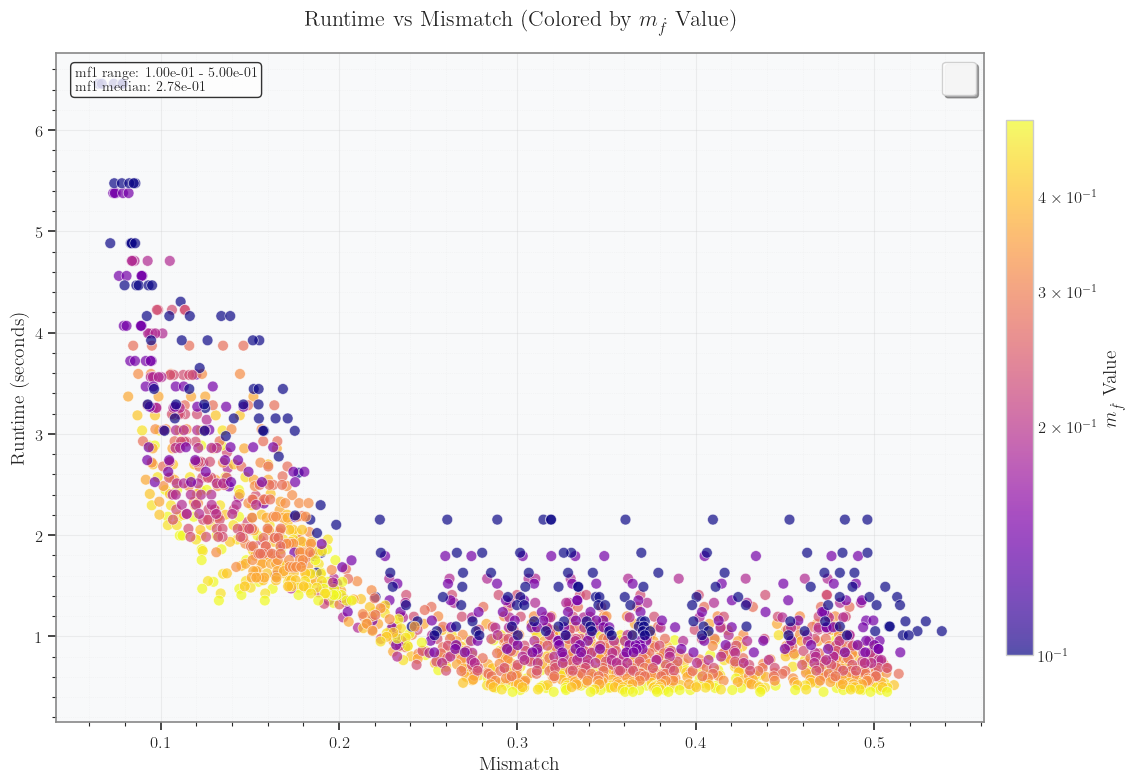

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LogNorm

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(12, 8))  # Larger to accommodate colorbar

# Create scatter plot with enhanced color mapping using mf2
scatter = ax.scatter(data_mean.mismatch, data_mean.runtime,
                    alpha=0.7,                    # Good transparency for overlapping points
                    s=60,                         # Consistent point size
                    c=data_mean.mf1,              # Color represents mf2 values
                    cmap='plasma',               # Professional colormap (perceptually uniform)
                    norm=LogNorm(),               # Log normalization for mf2 (remove if linear scaling preferred)
                    edgecolors='white',           # White edges for better contrast
                    linewidth=0.5,)

# Add colorbar for mf2 values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, aspect=20, pad=0.02)
cbar.set_label(r'$m_{\dot{f}}$ Value', fontsize=14, fontweight='medium')
cbar.ax.tick_params(labelsize=12)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title(r'Runtime vs Mismatch (Colored by $m_{\dot{f}}$ Value)',
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True,
          shadow=True, framealpha=0.9, borderpad=1)

# Optional: Add statistics text box
mf1_stats = f'mf1 range: {data_mean.mf1.min():.2e} - {data_mean.mf1.max():.2e}\n'
mf1_stats += f'mf1 median: {data_mean.mf1.median():.2e}'
ax.text(0.02, 0.98, mf1_stats, transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontsize=10)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('images/runtime_vs_mismatch_mf1-2.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_4844/3213520123.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', frameon=True, fancybox=True,


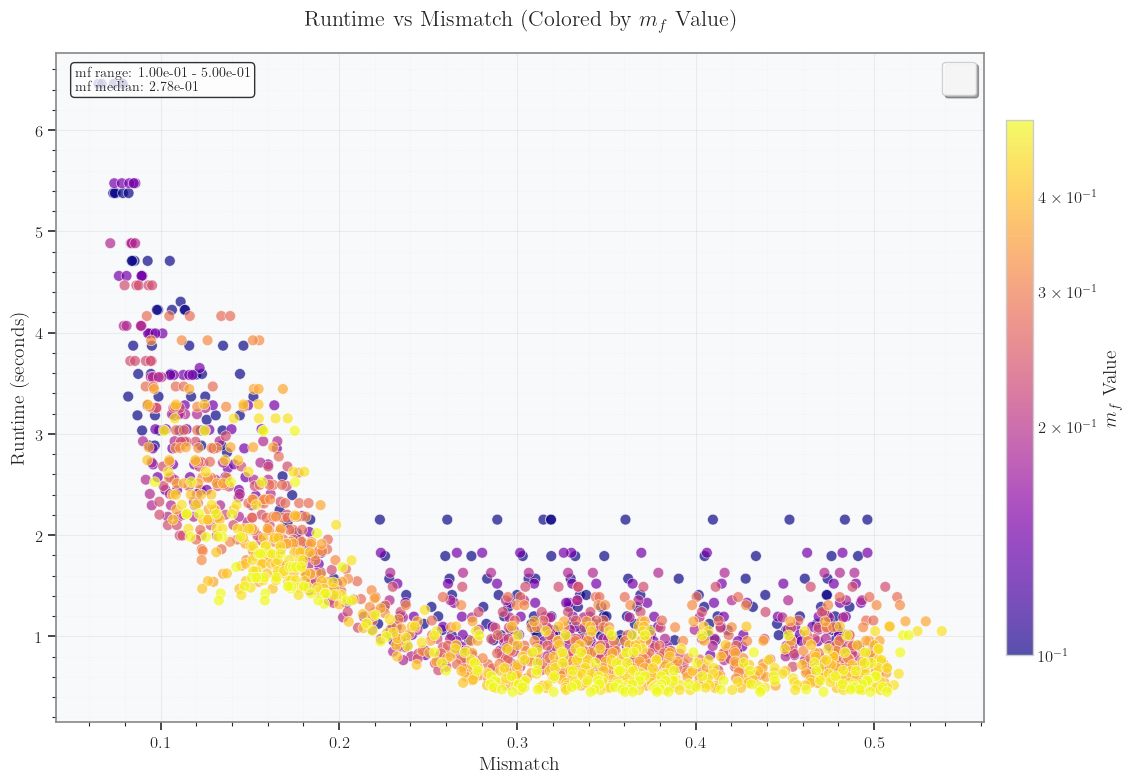

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LogNorm

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(12, 8))  # Larger to accommodate colorbar

# Create scatter plot with enhanced color mapping using mf2
scatter = ax.scatter(data_mean.mismatch, data_mean.runtime,
                    alpha=0.7,                    # Good transparency for overlapping points
                    s=60,                         # Consistent point size
                    c=data_mean.mf,              # Color represents mf2 values
                    cmap='plasma',               # Professional colormap (perceptually uniform)
                    norm=LogNorm(),               # Log normalization for mf2 (remove if linear scaling preferred)
                    edgecolors='white',           # White edges for better contrast
                    linewidth=0.5,)

# Add colorbar for mf2 values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, aspect=20, pad=0.02)
cbar.set_label(r'$m_f$ Value', fontsize=14, fontweight='medium')
cbar.ax.tick_params(labelsize=12)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title(r'Runtime vs Mismatch (Colored by $m_f$ Value)',
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True,
          shadow=True, framealpha=0.9, borderpad=1)

# Optional: Add statistics text box
mf_stats = f'mf range: {data_mean.mf.min():.2e} - {data_mean.mf.max():.2e}\n'
mf_stats += f'mf median: {data_mean.mf.median():.2e}'
ax.text(0.02, 0.98, mf_stats, transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontsize=10)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('images/runtime_vs_mismatch_mf-2.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()
